# 目次
- [C言語ライブラリのラッパー](#C言語ライブラリのラッパー)
    - [線形代数（np.linalg）](#線形代数（np.linalg）)
        - [np.linalgを用いた最小二乗法](#np.linalgを用いた最小二乗法)
    - [乱数生成（np.random）](#乱数生成（np.random）)
    - [フーリエ変換（np.fft）](#フーリエ変換（np.fft）)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebookに画像を表示
%matplotlib inline

# C言語ライブラリのラッパー
Numpyでは、C言語のライブラリをPythonから簡単に呼び出すことができるモジュールが用意されています。   
このように、他言語のライブラリの関数をPythonで呼び出せるようにしたものを**ラッパー（wrapper）**といいます。  
もともとのライブラリをPython関数で包み込むイメージです。  
モジュール名をクリックするとNumpy公式ドキュメントに飛ぶようになっています。  

## [線形代数（np.linalg）](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
**np.linalg**は、元々Fortranで書かれた[**LAPACK**](http://www.netlib.org/lapack/)がC言語に変換されたものをラップしたものです。  
LAPACKの関数と一対一に対応しているわけではなく、より単純なインターフェイスで呼び出せるようになっています。  
逆行列を求めたり、固有値分解、特異値分解など線形代数を網羅するライブラリです（詳細は[公式ドキュメント](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)を参照）。  

In [2]:
# ３×３の二次元行列
A = np.random.rand(3, 3)
A

array([[0.46612034, 0.60892606, 0.26997846],
       [0.47790591, 0.22013541, 0.06867734],
       [0.69329167, 0.63742362, 0.71229069]])

In [3]:
# 逆行列を求めるinv関数
B = np.linalg.inv(A)
B

array([[-1.33648575,  3.09386419,  0.20826328],
       [ 3.46224007, -1.7126982 , -1.14715341],
       [-1.7974953 , -1.47866033,  2.22779198]])

In [4]:
# 積を取ると単位行列になる
A @ B

array([[ 1.00000000e+00,  1.81071354e-16,  1.54146920e-16],
       [ 1.74856988e-16,  1.00000000e+00, -1.44013540e-17],
       [ 7.63875134e-17,  6.40829944e-17,  1.00000000e+00]])

ある一つの軸から一つの値を取り出す操作としてノルムや最大値などがあります。  

In [5]:
# normを取る（ようするにL2ユークリッドノルム）
np.linalg.norm([3., 4.])

5.0

このnorm関数に多次元配列を渡し、軸を指定すると、その軸に沿ってノルムを取ります。  
つまりその軸がスカラーに縮約され、軸がなくなります。  

In [6]:
# 多次元配列を定義
arr = np.arange(15).reshape(5, 3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [7]:
# 各列についてノルム関数を適用する
np.linalg.norm(arr, axis=0)

array([16.43167673, 18.30300522, 20.24845673])

In [8]:
# 各行についてノルム関数を適用する
np.linalg.norm(arr, axis=1)

array([ 2.23606798,  7.07106781, 12.20655562, 17.3781472 , 22.56102835])

### np.linalgを用いた最小二乗法
下のような線形に増加するデータを最小二乗法でフィッティングすることを考えます。

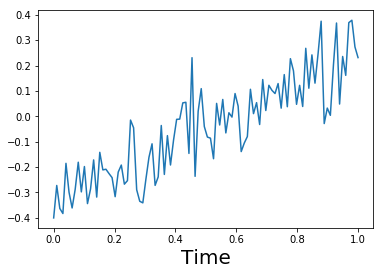

In [9]:
t = np.linspace(0, 1, 100)
signal = 0.5 * t - 0.3 + 0.1 * np.random.randn(t.size)
plt.plot(t, signal)
plt.xlabel('Time', fontsize=20)
plt.show()

データ$d$、Green関数$G$、パラメータ$m$を使うと
$$d = Gm$$
のようになります。  
これを$m$について解くと
$$m = (G^T G)^{-1}G^Td$$

In [10]:
# Green関数
G = np.vstack((np.ones(t.size), t)).T
G[:10]

array([[1.        , 0.        ],
       [1.        , 0.01010101],
       [1.        , 0.02020202],
       [1.        , 0.03030303],
       [1.        , 0.04040404],
       [1.        , 0.05050505],
       [1.        , 0.06060606],
       [1.        , 0.07070707],
       [1.        , 0.08080808],
       [1.        , 0.09090909]])

In [11]:
m = np.linalg.inv(G.T @ G) @ G.T @ signal
m

array([-0.3363659 ,  0.58187228])

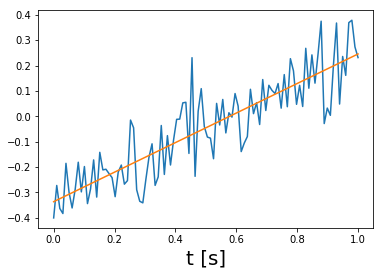

In [12]:
plt.plot(t, signal)
plt.plot(t, m[0] + m[1] * t)
plt.xlabel('t [s]', fontsize=20)
plt.show()

うまく線形フィッティングできました。

## [乱数生成（np.random）](https://docs.scipy.org/doc/numpy/reference/routines.random.html)
科学技術計算で広く使われている擬似乱数生成器である**メルセンヌ・ツイスター**をラップしているモジュールです。  
高品質でかつ、高速な乱数生成で有名なライブラリです。  
np.randomでは、様々な確率分布で乱数を生成できるような関数群が用意されています（[Distributions](https://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions)）。  
主な関数を表にまとめました。

|関数名|説明|
|:-----:|:--:|
|rand|一様乱数|
|randn|標準正規分布乱数|
|randint|整数乱数|
|choice|与えられたndarrayからランダムに選び出す|
|normal|正規分布乱数|

どの関数もshapeまたはsizeが指定でき、簡単に乱数を生成できます。

In [13]:
# [0, 1)の範囲で一様乱数を求める
np.random.rand(10)

array([0.97382657, 0.41248297, 0.1238543 , 0.37402564, 0.78502203,
       0.59992254, 0.52690744, 0.16414012, 0.22352167, 0.72379044])

In [14]:
# ３×３の標準正規分布乱数
np.random.randn(3, 3)

array([[ 0.65395076, -0.21583941, -0.0865184 ],
       [ 1.37401718, -0.11509937,  0.91315171],
       [ 1.11642899,  0.8225766 , -0.22606108]])

In [15]:
# 任意のオブジェクトのリストからランダムに取り出す
np.random.choice(list("abcde"), size=10)

array(['a', 'd', 'a', 'c', 'd', 'a', 'a', 'd', 'e', 'e'], dtype='<U1')

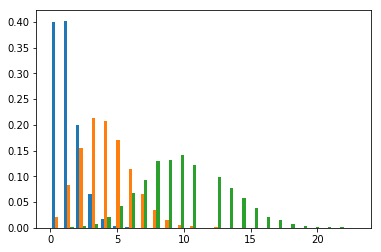

In [16]:
# ポアソン分布のヒストグラム
plt.hist(np.random.poisson(lam=[1, 4, 10], size=(10000, 3)), density=True, bins=25)
plt.show()

## [フーリエ変換（np.fft）](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)
Cooley-Tukey型の高速離散フーリエ変換（FFT)のラッパーです。  
フーリエ変換一般に言えることですが、変換と逆変換の係数が実装によって異なります（定数倍するだけですが）。  
実装の詳細を知りたい人は [Implementation details](https://docs.scipy.org/doc/numpy/reference/routines.fft.html#implementation-details) を参照してください。  
下の表は[様々な関数](https://docs.scipy.org/doc/numpy/reference/routines.fft.html#standard-ffts)をまとめたものです。  

|関数名|説明|
|:-:|:-:|
|fft|１次元FFT|
|ifft|↑の逆変換|
|rfft|１次元実FFT|
|irfft|↑の逆変換|
|fft2|２次元FFT|
|ifft2|↑の逆変換|
|rfft2|２次元実FFT|
|irfft2|↑の逆変換|



In [17]:
# FFT
np.fft.fft([1., 3, 5, 3, 1])

array([13.        +0.j        , -4.23606798-3.07768354j,
        0.23606798+0.72654253j,  0.23606798-0.72654253j,
       -4.23606798+3.07768354j])

In [18]:
# 実FFT
res = np.fft.rfft([1., 3, 5, 3, 1])
res

array([13.        +0.j        , -4.23606798-3.07768354j,
        0.23606798+0.72654253j])

In [19]:
# 逆実FFT
np.fft.irfft(res)

array([1.19098301, 4.72982477, 5.42705098, 1.65214124])

In [20]:
# 逆実フーリエ変換
np.fft.irfft(res, n=5)

array([1., 3., 5., 3., 1.])

信号処理の一例です。  
フィルターなどの高度な信号処理は[**scipy.signal**](https://docs.scipy.org/doc/scipy/reference/signal.html)を用いてください。

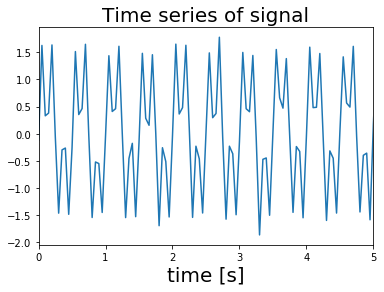

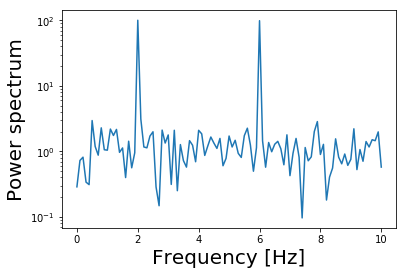

In [21]:
# サンプリング周波数（ナイキスト周波数＝10Hz）
rate = 20 # [1/s]

# サンプル時刻 [s]
t = np.arange(0, 10, 1/rate)

# 2Hzと6Hzにピークを持つシグナル（に正規分布ノイズを加えたもの）
signal = np.sin(2*np.pi*2*t) + np.sin(2*np.pi*6*t) + 0.1 * np.random.randn(t.size)
plt.plot(t, signal)
plt.xlim(0, 5)
plt.xlabel('time [s]', fontsize=20)
plt.title('Time series of signal', fontsize=20)
plt.show()

# power spectrum
p = np.abs(np.fft.rfft(signal))

# サンプリングレート（の逆数）を与えると各成分の周波数を返す
f = np.fft.rfftfreq(signal.size, d=1./rate)

plt.xlabel("Frequency [Hz]", fontsize=20)
plt.ylabel("Power spectrum", fontsize=20)
plt.yscale("log")
plt.plot(f, p)
plt.show()